## Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage.interpolation import shift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

## Load the Data

In [0]:
data = np.loadtxt('MI_timesteps.txt', skiprows=1, delimiter=' ')

## Filter the first three columns into another DF

In [0]:
# Ignoring the first 1000 rows
start = 1001
end = 15001
size = 350

# Separate dataframe for storing the first 3 areas
filtered_data = pd.DataFrame()

In [0]:
# Very Slow. Need to use apply ?
for i in range(start, end+1 - size):
  filtered_data = filtered_data.append(pd.DataFrame(pd.DataFrame(data[i:i+size,1:4]).values.reshape(1,-1)))

print(filtered_data.shape)

(13651, 1050)


## Scale and transform the data then apply PCA
We will use 3 Principle Components here

In [0]:
filtered_data = StandardScaler().fit_transform(filtered_data)

In [0]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(filtered_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3'])

In [0]:
print("Total Variance Captured by the PCs : ", sum(pca.explained_variance_ratio_)*100, "%")
print("Variance Captured by each PC : ", pca.explained_variance_ratio_)

Total Variance Captured by the PCs :  75.12352535362612 %
Variance Captured by each PC :  [0.33248507 0.24983696 0.16891322]


## Introduce Color as a column based on the paramter we want to distinguish on.
There are 9 such params and we re-run changing this everytime.

In [0]:
principalDf['Color'] = data[start:(end-size+1),9]

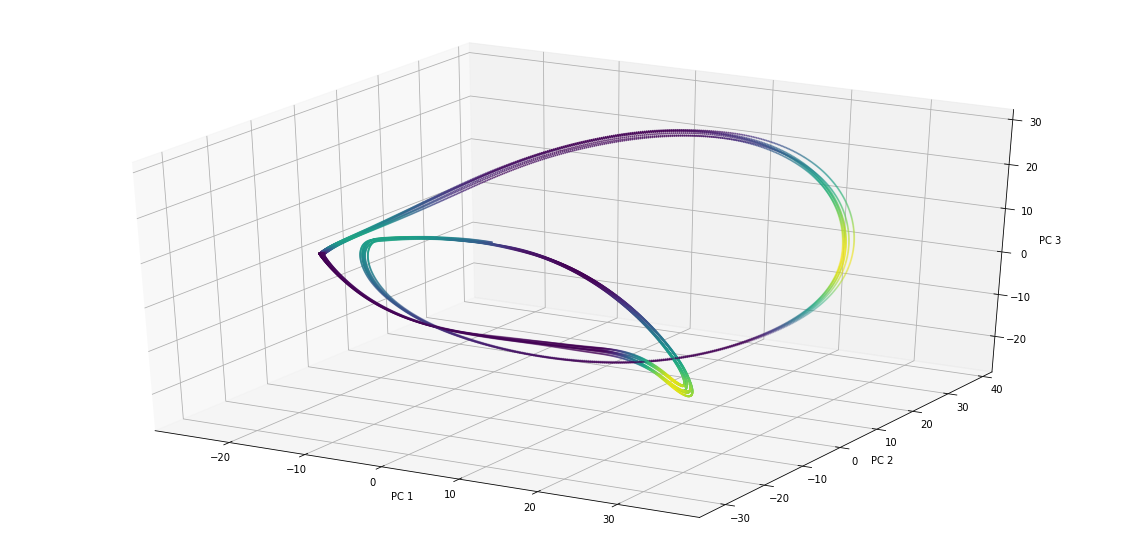

In [0]:
plt.figure(figsize=(20,10))

ax = plt.axes(projection='3d')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.scatter3D(np.asarray(principalDf.loc[:,'PC 1']), np.asarray(principalDf.loc[:,'PC 2']), np.asarray(principalDf.loc[:,'PC 3']), s=1, c= principalDf['Color'])

## Computing how Fast the system advances over the PCA space

In [0]:
# Calculate change over the point pairs
arc_len_tab = pd.DataFrame(columns=['Speed','Cumulative Speed'])
cumulative_speed = 0
for i in range(principalDf.shape[0] -1):
  x_0 = principalDf.iloc[i,0:3]
  x_1 = principalDf.iloc[i+1,0:3]
  v = x_1 - x_0
  speed = np.linalg.norm(v)
  cumulative_speed += speed
  arc_len_tab = arc_len_tab.append({'Speed': speed, 'Cumulative Speed' : cumulative_speed}, ignore_index= True)


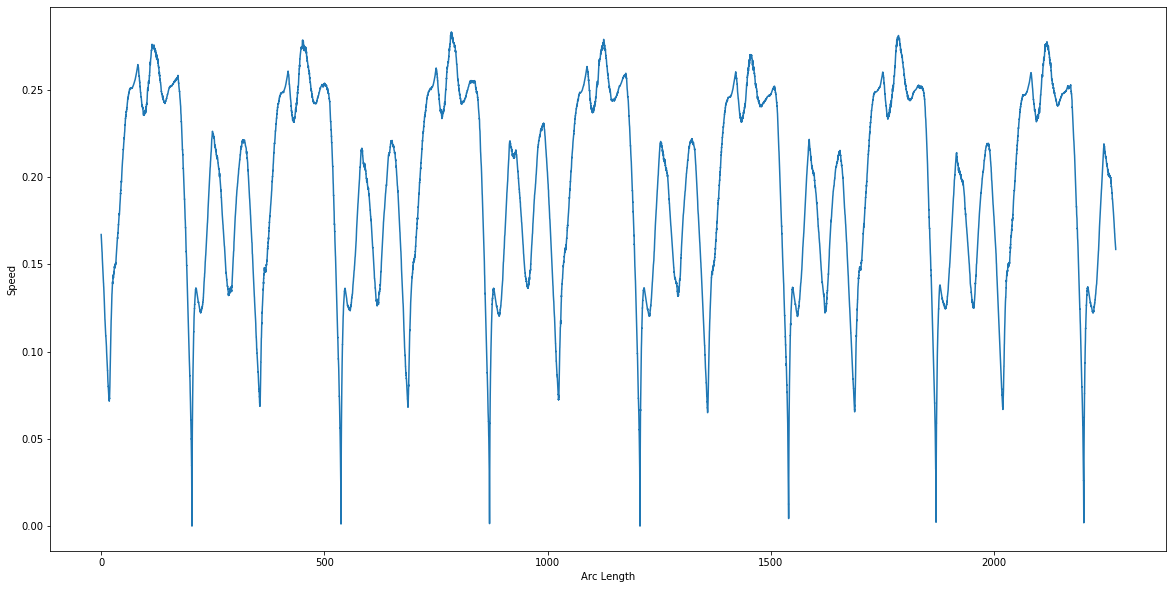

In [0]:
plt.figure(figsize=(20,10))
plt.ylabel('Speed')
plt.xlabel('Arc Length')
plt.plot(np.asarray(arc_len_tab.loc[:,'Cumulative Speed']),np.asarray(arc_len_tab.loc[:, 'Speed']))